In [110]:
import pandas as pd
import numpy as np

In [2]:
hr_df = pd.read_csv(r'hr_data.csv')

In [5]:
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


### Checking if we have any null values

In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


### Checking Unique values

In [8]:
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

## Importing another data set

In [10]:
s_df = pd.read_excel(r'employee_satisfaction_evaluation.xlsx')

In [11]:
s_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


### Merging/Joing both data sets

In [12]:
main_df = hr_df.set_index('employee_id').join(s_df.set_index('EMPLOYEE #'))

In [13]:
main_df = main_df.reset_index()
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


### Checking for null values

In [15]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [17]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Filling null values by mean of the columns

In [18]:
main_df.fillna(main_df.mean(), inplace = True)

In [19]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14999 non-null  float64
 10  last_evaluation        14999 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [20]:
# An empty data
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [17]:
# main_df.loc[main_df['employee_id']==3794]

### Droping Employee Id column

In [21]:
main_df.drop(columns='employee_id', inplace = True)

## Value Counts of DEPARTMENT & LEFT column

In [19]:
main_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [22]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [21]:
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [22]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

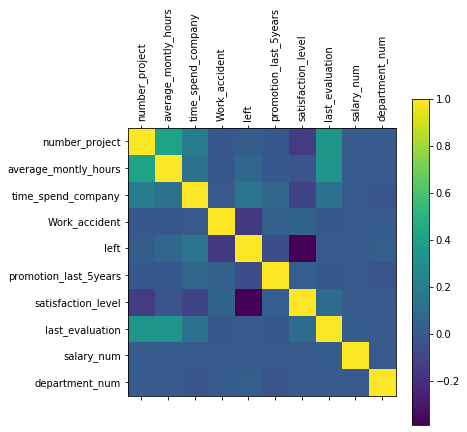

In [212]:
def plot_cor(df, size = 6):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
#     ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_cor(main_df)

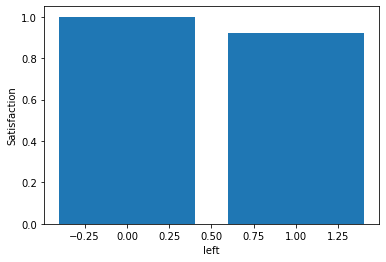

In [47]:
plt.bar(x = main_df['left'], height = main_df['satisfaction_level'])
plt.xlabel('left')
plt.ylabel('Satisfaction')
plt.show()

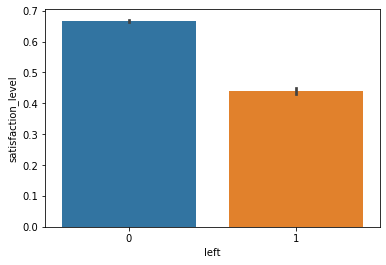

In [45]:
sns.barplot(x = 'left', y = 'satisfaction_level', data = main_df)

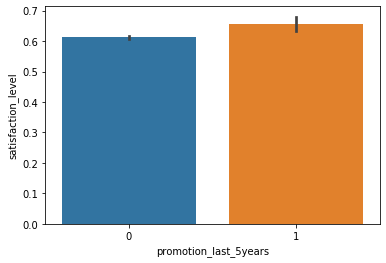

In [48]:
sns.barplot(x = 'promotion_last_5years', y = 'satisfaction_level', data = main_df)

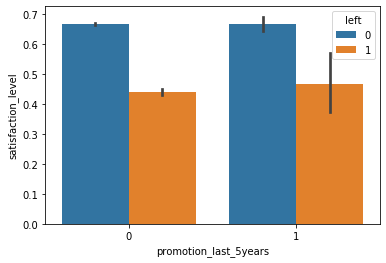

In [49]:
sns.barplot(x = 'promotion_last_5years', y = 'satisfaction_level', data = main_df, hue = 'left')

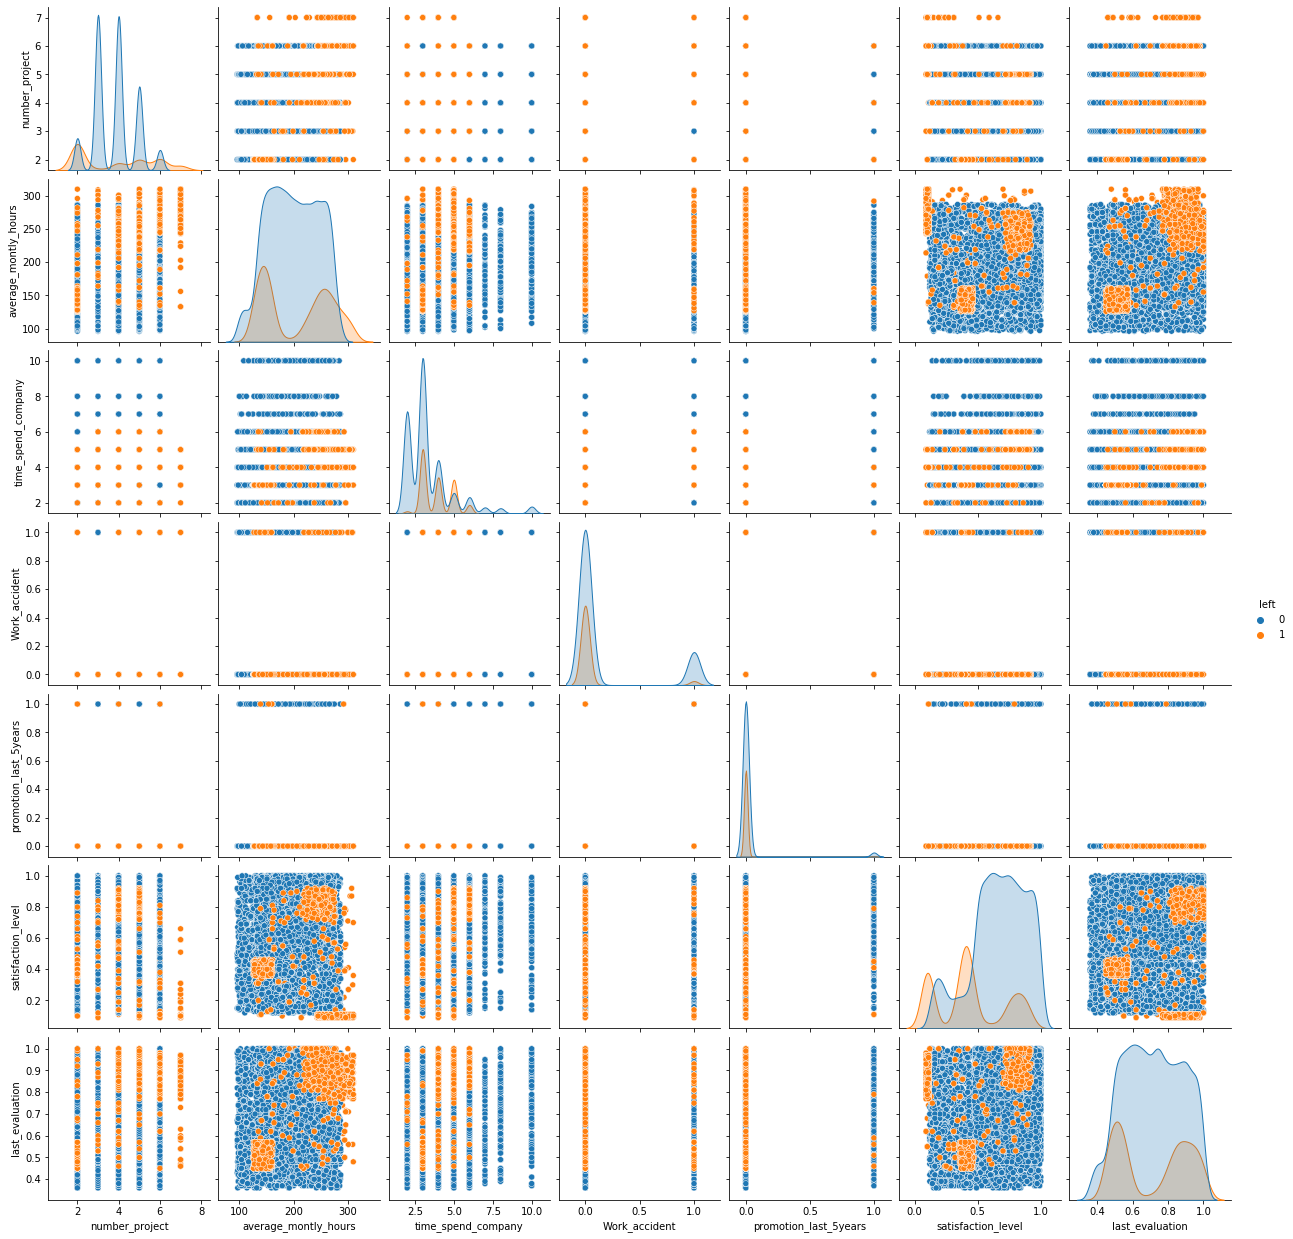

In [51]:
sns.pairplot(main_df, hue = 'left')

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le  = LabelEncoder()

In [54]:
k = le.fit_transform(main_df['salary'])
k

array([1, 2, 2, ..., 1, 1, 1])

In [56]:
main_df['salary_num'] = k

In [ ]:
main_df.drop(['salary'], axis = 1, inplace = True)

In [66]:
l = le.fit_transform(main_df['department'])
l

array([7, 7, 7, ..., 8, 8, 8])

In [67]:
main_df['department_num'] = l

In [69]:
main_df.drop(['department'], axis = 1, inplace = True)

In [70]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


In [76]:
x = main_df.drop(['left'], axis = 1)

In [103]:
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
5955,3,215,2,0,0,0.70,0.98,1,7
13296,3,138,6,1,0,0.57,0.67,2,0
3927,4,234,2,0,0,0.63,0.97,2,9
12656,5,235,5,0,0,0.79,0.86,2,8
9203,6,106,5,0,0,0.24,0.74,1,9
...,...,...,...,...,...,...,...,...,...
13837,3,155,10,0,0,0.34,0.46,2,6
3728,4,129,4,0,0,0.21,0.37,2,6
11884,3,275,2,0,0,0.61,0.49,1,6
12883,4,243,3,0,0,0.87,0.97,0,0


In [116]:
y_train

5955     0
13296    0
3927     0
12656    1
9203     0
        ..
13837    0
3728     0
11884    0
12883    0
2480     0
Name: left, Length: 10499, dtype: int64

In [79]:
y = main_df['left']


In [82]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Spliting data into training and testing

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Training the models

## 1. Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
prediction_dt = dt.predict(x_test)

In [99]:
prediction_dt.size

4500

# Accuracy of Decision Tree Classifier

In [100]:
from sklearn.metrics import accuracy_score

In [185]:
accuracy_dt = accuracy_score(y_test, prediction_dt)*100

In [186]:
accuracy_dt

97.4888888888889

#### Data to be added in order: 
1. number_project, 
2. average_montly_hours, 
3. time_spend_company 
4. Work_accident 
5. promotion_last_5years 
6. satisfaction_level
7. last_evaluation
8. salary_num
9. department_num

In [134]:
category = ['Employee will stay...', 'Employee will leave...']

In [137]:
data = np.array([10, 235, 5, 0, 1, 0.78, 0.96, 2, 8]).reshape(1, -1)

In [138]:
print(category[int(dt.predict(data))])

Employee will leave...


### Prameters behind leaving/staying in the company in order of their importance:

In [203]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = x_train.columns, columns = ['Importance'])
feature_importance.sort_values('Importance', ascending = False)

,Importance
satisfaction_level,0.492562
last_evaluation,0.150694
time_spend_company,0.138497
number_project,0.100992
average_montly_hours,0.100032
department_num,0.012093
salary_num,0.004049
Work_accident,0.001065
promotion_last_5years,0.000015


## 2. KNN Algorithm

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
sc = StandardScaler().fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [216]:
x_train_std

array([[-0.65833618,  0.28608208, -1.03082669, ...,  1.54670208,
        -0.55365072,  0.3921008 ],
       [-0.65833618, -1.25681292,  1.67483567, ..., -0.26116795,
         1.05164586, -2.05496647],
       [ 0.15158549,  0.66679643, -1.03082669, ...,  1.48838369,
         1.05164586,  1.09126288],
       ...,
       [-0.65833618,  1.48833792, -1.03082669, ..., -1.31089893,
        -0.55365072,  0.04251976],
       [ 0.15158549,  0.8471348 , -0.3544111 , ...,  1.48838369,
        -2.15894731, -2.05496647],
       [-0.65833618,  0.68683402, -1.03082669, ...,  1.08015498,
         1.05164586,  1.09126288]])

In [217]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [218]:
predicted_knn = knn.predict(x_test_std)

# Accuracy of KNN

In [219]:
accuracy_knn = accuracy_score(predicted_knn, y_test) *100
accuracy_knn

96.15555555555557

### Finding correct value for K

In [176]:
scores = {}
score_list = []

for i in range(1, 25):
    knnz = KNeighborsClassifier(n_neighbors = i)
    knnz.fit(x_train_std, y_train)
    predicted_knn = knnz.predict(x_test_std)
    scores[i] = accuracy_score(predicted_knn, y_test)*100
    score_list.append(scores[i])

In [177]:
scores

{1: 96.84444444444445,
 2: 96.77777777777777,
 3: 95.91111111111111,
 4: 96.15555555555557,
 5: 95.39999999999999,
 6: 95.75555555555556,
 7: 95.31111111111112,
 8: 95.6888888888889,
 9: 95.19999999999999,
 10: 95.55555555555556,
 11: 95.15555555555557,
 12: 95.33333333333334,
 13: 95.15555555555557,
 14: 95.19999999999999,
 15: 95.0,
 16: 95.04444444444444,
 17: 94.86666666666666,
 18: 94.97777777777779,
 19: 94.86666666666666,
 20: 94.86666666666666,
 21: 94.84444444444445,
 22: 94.88888888888889,
 23: 94.68888888888888,
 24: 94.68888888888888}

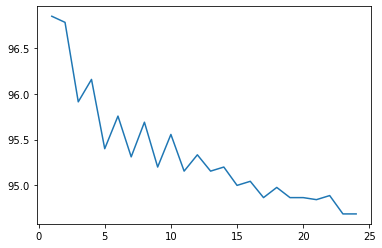

In [178]:
plt.plot(range(1, 25), score_list)

## Custom Data Prediction

In [ ]:
category = ['Employee will stay...', 'Employee will leave...']

In [182]:
data = np.array([10, 135, 5, 0, 1, 0.78, 0.96, 2, 8]).reshape(1, -1)
data_std = sc.transform(data)

### From Decision Tree

In [183]:
print(category[int(dt.predict(data))])

Employee will stay...


### From KNN

In [184]:
print(category[int(knn.predict(data_std))])

Employee will stay...


In [208]:
algorithms = ['Decision Tree', 'KNN']
scores = [accuracy_dt, accuracy_knn] 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


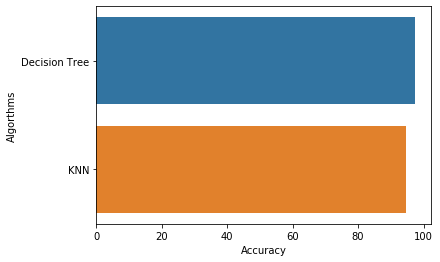

In [211]:
plt.xlabel("Accuracy")
plt.ylabel("Algorthms")
sns.barplot(scores, algorithms)
plt.show()